## 範例目標

* 了解 Padding 的作法
* 了解 Pooling 的作法

## 範例說明

1. zero_pad: 原圖和特徵圖的比對
2. pool_forward: 前行網路的池化層

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

# 預先設定 matplotlib 的繪圖參數
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['figure.figsize'] = (16.0, 9.0,)

# 執行代碼前 IPython 會自動重載改動的模塊
%reload_ext autoreload
%autoreload 2

In [2]:
# 資料的第 1 ~ 2 軸為高度和寬度需要左右補 0
def zero_pad(image, pad):
    return np.pad(image, ((0, 0,), (pad, pad,), (pad, pad,), (0, 0,),), 'constant', constant_values=(0, 0,))

# 資料的第 0 ~ 3 軸分別為影像張數(Amount)、高度(Height)、寬度(Width)、深度(Channel)
def pool_forward(image, pool_size=(2, 2,), stride=2, mode='max'):
    p_h, p_w, p_s = *pool_size, stride
    i_a, i_h, i_w, i_d = image.shape
    o_a, o_h, o_w, o_d = i_a, (i_h - p_h) // p_s + 1, (i_w - p_w) // p_s + 1, i_d
    output_image = np.zeros((o_a, o_h, o_w, o_d,))
    for n in range(o_a):
        for i in range(o_h):
            for j in range(o_w):
                for k in range(o_d):
                    output_image[n, i, j, k] = pool_forward_step(image[n, i:i * p_s + p_h, j:j * p_s + p_w, k], mode)
    return output_image, {'image': image, 'pool_size': pool_size, 'stride': 2, 'mode': mode} # 緩存資料和超參數可供反向傳播。

# 池化模式有 max 和 average 兩種
def pool_forward_step(a_slice, mode):
    if mode == 'max':
        return np.max(a_slice)
    return np.mean(a_slice)

# 展示每個影像堆疊的第一張
def show_first_images(title_image_pairs):
    fig, axes = plt.subplots(1, len(title_image_pairs))
    for i, (title, image) in enumerate(title_image_pairs):
        axes[i].set_title(title)
        axes[i].imshow(image[0, :, :, 0])

In [3]:
pad = 1
image = np.random.randn(1, 3, 3, 1)
image_pad = zero_pad(image, pad)

In [4]:
print('image:')
print(image.reshape((3, 3,)))
print()
print('image_pad:')
print(image_pad.reshape((3 + pad * 2, 3 + pad * 2,)))

image:
[[-0.41675785 -0.05626683 -2.1361961 ]
 [ 1.64027081 -1.79343559 -0.84174737]
 [ 0.50288142 -1.24528809 -1.05795222]]

image_pad:
[[ 0.          0.          0.          0.          0.        ]
 [ 0.         -0.41675785 -0.05626683 -2.1361961   0.        ]
 [ 0.          1.64027081 -1.79343559 -0.84174737  0.        ]
 [ 0.          0.50288142 -1.24528809 -1.05795222  0.        ]
 [ 0.          0.          0.          0.          0.        ]]


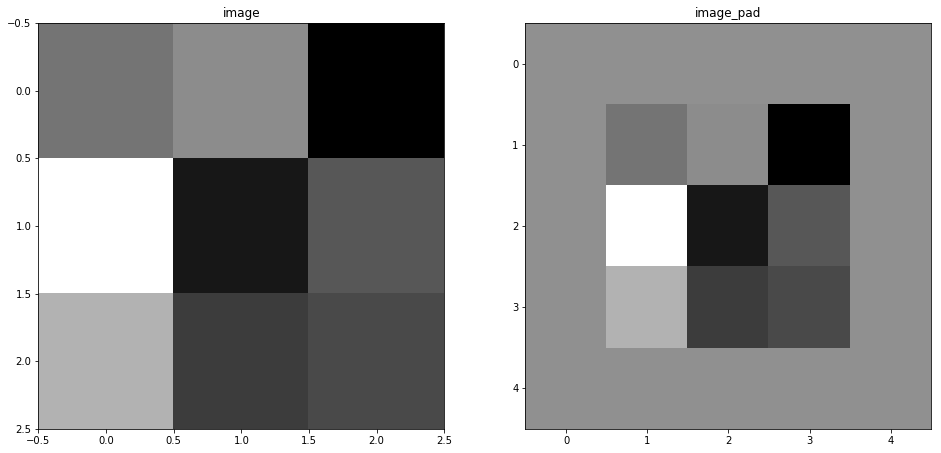

In [5]:
show_first_images(list(zip(('image', 'image_pad',), (image, image_pad,))))

In [6]:
pad = 1
image = np.random.randn(4, 9, 16, 1)
image = zero_pad(image, pad)

In [7]:
image_max_pool, _ = pool_forward(image)
image_avg_pool, _ = pool_forward(image, mode='average')

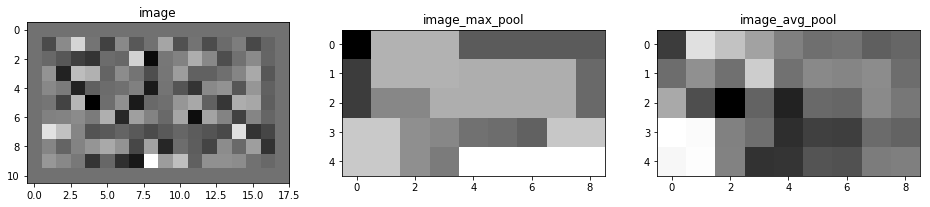

In [8]:
show_first_images(list(zip(('image', 'image_max_pool', 'image_avg_pool',), (image, image_max_pool, image_avg_pool,))))